# §106, ESV, Clauses

In [1]:
from my_tools import *

/Users/cody/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [35]:
from IPython.display import display, HTML

In [2]:
ts = TextShower(
    default=['ref', 'text_full', 'sentence', 'esv_TAMspan', 'esv_TAM']
)

In [3]:
main_semantics = [
    'PAST..IND',     # she wrote
    'PRES.PERF.IND', # he has written
    'PRES..IND',     # she writes
    'PAST.PERF.IND', # she had written
]

esv_df =  qatal_dfs[qatal_dfs.esv_TAM.isin(main_semantics)]

# remove 'did not' for now; perhaps could be considered simple past?
esv_df = esv_df[~esv_df.esv_TAMspan.str.match('.*did not')]

esv_df.shape

(12279, 67)

## Clause Dependency

counts:


clause_rela,Main,SubAdv,SubMod,SubArg
esv_TAM,,,,
PAST..IND,3190,829,1046,138
PRES.PERF.IND,1906,790,601,135
PRES..IND,1948,497,154,33
PAST.PERF.IND,231,254,419,108



proportions 1:


clause_rela,Main,SubAdv,SubMod,SubArg
esv_TAM,,,,
PAST..IND,0.613108,0.159331,0.201038,0.026523
PRES.PERF.IND,0.555361,0.230186,0.175117,0.039336
PRES..IND,0.740122,0.188830,0.058511,0.012538
PAST.PERF.IND,0.228261,0.250988,0.414032,0.106719


None


proportions 2:


esv_TAM,PAST..IND,PRES.PERF.IND,PRES..IND,PAST.PERF.IND
clause_rela,,,,
Main,0.438488,0.261993,0.267766,0.031753
SubAdv,0.349789,0.333333,0.209705,0.107173
SubMod,0.471171,0.270721,0.069369,0.188739
SubArg,0.333333,0.326087,0.079710,0.260870


None


Fisher's test with log transform:


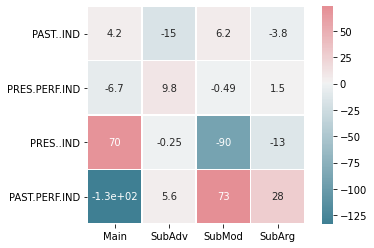

In [4]:
cl_dep = Analyze(esv_df, 'esv_TAM', 'clause_rela')

cl_dep.show()

## Dependency with particles (x)

In [5]:
depx = Analyze(esv_df, 'esv_TAM', ['clause_rela', 'prec_part'])

In [6]:
depx.ct

clause_rela    Main SubMod Main SubAdv  ...     Main SubAdv           Main                           
prec_part         Ø  _>CR_  _W_   _KJ_  ... _W_>T_W_  _KMW_ _W_>T_W_>T_>T_ _W_>T_W_>T_W_>T_W_>T_W_>T_
esv_TAM                                 ...                                                          
PAST..IND       890    975  968    315  ...        0      0              1                          1
PRES.PERF.IND  1004    545  252    423  ...        1      1              0                          0
PRES..IND       950    117  197    239  ...        0      0              0                          0
PAST.PERF.IND    35    391   95     90  ...        0      0              0                          0

[4 rows x 706 columns]

In [7]:
max_highlighter(depx.pr)

In [8]:
max_highlighter(depx.pr2.head(25))

In [10]:
depx.fish

Main     SubMod       Main  ...    SubAdv           Main                           
                       Ø      _>CR_        _W_  ...     _KMW_ _W_>T_W_>T_>T_ _W_>T_W_>T_W_>T_W_>T_W_>T_
PAST..IND     -46.200615   7.821191  72.320768  ...  0.000000       0.372909                   0.372909
PRES.PERF.IND  19.941780  -0.612083 -26.944662  ...  0.553616       0.000000                   0.000000
PRES..IND      61.814102 -97.533985 -18.305091  ...  0.000000       0.000000                   0.000000
PAST.PERF.IND -74.521872  69.823998  -2.568806  ...  0.000000       0.000000                   0.000000

[4 rows x 706 columns]

Let's get a narrower set that can be plotted with a heatmap.

**We thus aim to select the top of the group, the most common 
categories.**

In [11]:
depx_sum_ct = depx.ct.sum().sort_values(ascending=False).head(20)

depx_sum_ct

clause_rela  prec_part
Main         Ø            2879
SubMod       _>CR_        2028
Main         _W_          1512
SubAdv       _KJ_         1067
Main         _KH_          406
SubAdv       _K_>CR_       369
SubArg       _KJ_          200
Main         _B_           180
             _W_>T_        178
SubMod       Ø             106
Main         _W_B_          96
SubAdv       Ø              81
Main         _MN_           79
SubAdv       _W_            77
SubArg       _>CR_          75
SubAdv       _>M_           73
Main         _W_W_          72
             _<L_KN_        72
             _L_            71
             _W_L_          70
dtype: int64

In [12]:
top_depx = depx_sum_ct[depx_sum_ct > 100]
bottom_depx = depx_sum_ct[depx_sum_ct < 100]

top_depx.sum()

8925

In [13]:
bottom_depx.sum()

766

In [14]:
# % represented in our sample: 

top_depx.sum() / depx_sum_ct.sum()

0.9209575895160458

This selection accounts for 92% of the whole qatal sample with ESV.

**Now plot heatmap...**

In [15]:
depx_top_fish = depx.fish.loc[:, top_depx.index]

depx_top_fish

clause_rela         Main     SubMod       Main     SubAdv  ...     SubArg      Main               SubMod
prec_part              Ø      _>CR_        _W_       _KJ_  ...       _KJ_       _B_     _W_>T_         Ø
PAST..IND     -46.200615   7.821191  72.320768 -18.755973  ...  -2.951772  1.396462  17.844028  0.158757
PRES.PERF.IND  19.941780  -0.612083 -26.944662  17.171759  ...  -0.237664 -0.210148  -3.849834 -0.288863
PRES..IND      61.814102 -97.533985 -18.305091   0.361571  ...  -6.465411  0.281954  -8.226412  0.042951
PAST.PERF.IND -74.521872  69.823998  -2.568806   0.088471  ...  26.332077 -5.179848  -1.421611  0.225376

[4 rows x 10 columns]

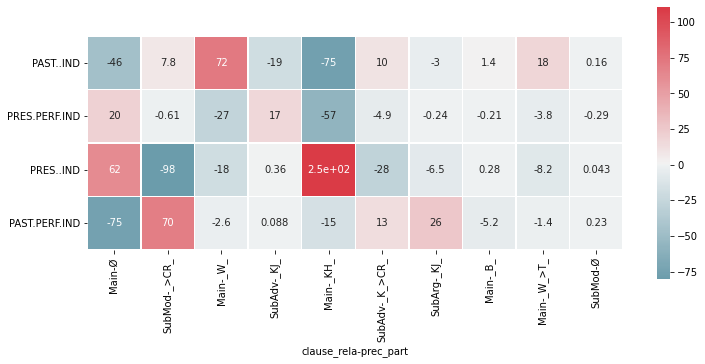

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))
heatmap(depx_top_fish, ax=ax, robust=True)

In [21]:
for tam in depx_top_fish.index:
    print(tam)
    display(depx_top_fish.loc[tam].sort_values(ascending=False).head(5))
    print()

PAST..IND


clause_rela  prec_part
Main         _W_          72.320768
             _W_>T_       17.844028
SubAdv       _K_>CR_      10.174877
SubMod       _>CR_         7.821191
Main         _B_           1.396462
Name: PAST..IND, dtype: float64


PRES.PERF.IND


clause_rela  prec_part
Main         Ø            19.941780
SubAdv       _KJ_         17.171759
Main         _B_          -0.210148
SubArg       _KJ_         -0.237664
SubMod       Ø            -0.288863
Name: PRES.PERF.IND, dtype: float64


PRES..IND


clause_rela  prec_part
Main         _KH_         246.519003
             Ø             61.814102
SubAdv       _KJ_           0.361571
Main         _B_            0.281954
SubMod       Ø              0.042951
Name: PRES..IND, dtype: float64


PAST.PERF.IND


clause_rela  prec_part
SubMod       _>CR_        69.823998
SubArg       _KJ_         26.332077
SubAdv       _K_>CR_      13.337096
SubMod       Ø             0.225376
SubAdv       _KJ_          0.088471
Name: PAST.PERF.IND, dtype: float64

Let's retrieve some examples.

In [45]:
significant_sum = 0

for tam in depx_top_fish.index:
    
    assocs = depx_top_fish.loc[tam]
    top_assocs = assocs[assocs > 10]
    
    for context, value in top_assocs.iteritems():
        cl_dep, prec_part = context
        data_df = esv_df[
            (esv_df.esv_TAM == tam)
            & (esv_df.clause_rela == cl_dep)
            & (esv_df.prec_part == prec_part)
        ]
        display(HTML(f'<h3>{tam} with {cl_dep} {prec_part}</h3>'))
        display(HTML(f'<b>log-Fishers: {round(value, 4)}</b>'))
        print()
        display(ts.show(data_df, spread=15))
        
        # track how many examples have been sampled
        # i.e. how many combinations are significant statistically
        significant_sum += data_df.shape[0]


showing 15 of 968


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
15,Genesis 1:2,הָיְתָ֥ה,וְהָאָ֗רֶץ הָיְתָ֥ה תֹ֨הוּ֙ וָבֹ֔הוּ,was,PAST..IND
23417,Genesis 41:57,בָּ֣אוּ,וְכָל־הָאָ֨רֶץ֙ בָּ֣אוּ מִצְרַ֔יְמָה לִשְׁבֹּ֖ר אֶל־יֹוסֵ֑ף,came,PAST..IND
86348,Numbers 26:29,הֹולִ֣יד,וּמָכִ֖יר הֹולִ֣יד אֶת־גִּלְעָ֑ד,was,PAST..IND
131225,Judges 6:34,לָבְשָׁ֖ה,וְר֣וּחַ יְהוָ֔ה לָבְשָׁ֖ה אֶת־גִּדְעֹ֑ון,clothed,PAST..IND
148647,1_Samuel 14:15,חָרְד֖וּ,הַמַּצָּב֙ וְהַמַּשְׁחִ֔ית חָרְד֖וּ גַּם־הֵ֑מָּה,trembled,PAST..IND
170924,2_Samuel 17:24,עָבַר֙,וְאַבְשָׁלֹ֗ם עָבַר֙ אֶת־הַיַּרְדֵּ֔ן ה֕וּא וְכָל־אִ֥ישׁ יִשְׂרָאֵ֖ל עִמֹּֽו׃,crossed,PAST..IND
188618,1_Kings 15:16,הָיְתָ֜ה,וּמִלְחָמָ֨ה הָיְתָ֜ה בֵּ֣ין אָסָ֗א וּבֵ֛ין בַּעְשָׁ֥א מֶֽלֶךְ־יִשְׂרָאֵ֖ל כָּל־יְמֵיהֶֽם׃,was,PAST..IND
203348,2_Kings 13:13,יָשַׁ֣ב,וְיָרָבְעָ֖ם יָשַׁ֣ב עַל־כִּסְאֹ֑ו,sat,PAST..IND
254833,Jeremiah 36:24,פָחֲד֔וּ,וְלֹ֣א פָחֲד֔וּ,was,PAST..IND



showing 15 of 218


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
5536,Genesis 12:4,דִּבֶּ֤ר,וַיֵּ֣לֶךְ אַבְרָ֗ם כַּאֲשֶׁ֨ר דִּבֶּ֤ר אֵלָיו֙ יְהוָ֔ה,told,PAST..IND
31885,Exodus 7:6,צִוָּ֧ה,וַיַּ֥עַשׂ מֹשֶׁ֖ה וְאַהֲרֹ֑ן כַּאֲשֶׁ֨ר צִוָּ֧ה יְהוָ֛ה אֹתָ֖ם,commanded,PAST..IND
52086,Exodus 40:15,מָשַׁ֨חְתָּ֙,וּמָשַׁחְתָּ֣ אֹתָ֗ם כַּאֲשֶׁ֤ר מָשַׁ֨חְתָּ֙ אֶת־אֲבִיהֶ֔ם,anointed,PAST..IND
63775,Leviticus 18:28,קָאָ֛ה,וְלֹֽא־תָקִ֤יא הָאָ֨רֶץ֙ אֶתְכֶ֔ם בְּטַֽמַּאֲכֶ֖ם אֹתָ֑הּ כַּאֲשֶׁ֥ר קָאָ֛ה אֶת־הַגֹּ֖וי אֲשֶׁ֥ר לִפְנֵיכֶֽם׃,vomited,PAST..IND
83778,Numbers 21:34,עָשִׂ֗יתָ,וְעָשִׂ֣יתָ לֹּ֔ו כַּאֲשֶׁ֣ר עָשִׂ֗יתָ לְסִיחֹן֙ מֶ֣לֶךְ הָֽאֱמֹרִ֔י אֲשֶׁ֥ר יֹושֵׁ֖ב בְּחֶשְׁבֹּֽון׃,did,PAST..IND
94532,Deuteronomy 3:2,עָשִׂ֗יתָ,וְעָשִׂ֣יתָ לֹּ֔ו כַּאֲשֶׁ֣ר עָשִׂ֗יתָ לְסִיחֹן֙ מֶ֣לֶךְ הָֽאֱמֹרִ֔י אֲשֶׁ֥ר יֹושֵׁ֖ב בְּחֶשְׁבֹּֽון׃,did,PAST..IND
109342,Deuteronomy 28:63,שָׂ֨שׂ,כַּאֲשֶׁר־שָׂ֨שׂ יְהוָ֜ה עֲלֵיכֶ֗ם לְהֵיטִ֣יב אֶתְכֶם֮ וּלְהַרְבֹּ֣ות אֶתְכֶם֒ כֵּ֣ן יָשִׂ֤ישׂ יְהוָה֙ עֲלֵיכֶ֔ם לְהַאֲבִ֥יד אֶתְכֶ֖ם וּלְהַשְׁמִ֣יד אֶתְכֶ֑ם,took,PAST..IND
119375,Joshua 10:40,צִוָּ֔ה,וְאֵ֤ת כָּל־הַנְּשָׁמָה֙ הֶחֱרִ֔ים כַּאֲשֶׁ֣ר צִוָּ֔ה יְהוָ֖ה אֱלֹהֵ֥י יִשְׂרָאֵֽל׃,commanded,PAST..IND
131048,Judges 6:27,דִּבֶּ֥ר,וַיַּ֕עַשׂ כַּאֲשֶׁ֛ר דִּבֶּ֥ר אֵלָ֖יו יְהוָ֑ה,told,PAST..IND



showing 15 of 133


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
8644,Genesis 19:10,סָגָֽרוּ,וְאֶת־הַדֶּ֖לֶת סָגָֽרוּ׃,shut,PAST..IND
49846,Exodus 36:34,עָשָׂ֣ה,וְאֶת־טַבְּעֹתָם֙ עָשָׂ֣ה זָהָ֔ב בָּתִּ֖ים לַבְּרִיחִ֑ם,made,PAST..IND
88998,Numbers 31:8,הָרְג֣וּ,וְאֶת־מַלְכֵ֨י מִדְיָ֜ן הָרְג֣וּ עַל־חַלְלֵיהֶ֗ם אֶת־אֱוִ֤י וְאֶת־רֶ֨קֶם֙ וְאֶת־צ֤וּר וְאֶת־חוּר֙ וְאֶת־רֶ֔בַע חֲמֵ֖שֶׁת מַלְכֵ֣י מִדְיָ֑ן,killed,PAST..IND
119028,Joshua 10:28,לָכַ֨ד,וְאֶת־מַקֵּדָה֩ לָכַ֨ד יְהֹושֻׁ֜עַ בַּיֹּ֣ום הַה֗וּא,captured,PAST..IND
128828,Judges 3:6,נָתְנ֣וּ,וְאֶת־בְּנֹותֵיהֶ֖ם נָתְנ֣וּ לִבְנֵיהֶ֑ם,gave,PAST..IND
144699,1_Samuel 7:1,קִדְּשׁ֔וּ,וְאֶת־אֶלְעָזָ֤ר בְּנֹו֙ קִדְּשׁ֔וּ לִשְׁמֹ֖ר אֶת־אֲרֹ֥ון יְהוָֽה׃ פ,consecrated,PAST..IND
162920,2_Samuel 4:12,לָקָ֔חוּ,וְאֵ֨ת רֹ֤אשׁ אִֽישׁ־בֹּ֨שֶׁת֙ לָקָ֔חוּ,took,PAST..IND
180670,1_Kings 6:29,קָלַ֗ע,וְאֵת֩ כָּל־קִירֹ֨ות הַבַּ֜יִת מֵסַ֣ב׀ קָלַ֗ע פִּתּוּחֵי֙ מִקְלְעֹות֙ כְּרוּבִ֣ים וְתִֽמֹרֹ֔ת וּפְטוּרֵ֖י צִצִּ֑ים מִלִּפְנִ֖ים וְלַחִיצֹֽון׃,carved,PAST..IND
191735,1_Kings 19:14,הָרְג֣וּ,וְאֶת־נְבִיאֶ֖יךָ הָרְג֣וּ בֶחָ֑רֶב,killed,PAST..IND



showing 15 of 1004


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
594,Genesis 1:29,נָתַ֨תִּי,הִנֵּה֩ נָתַ֨תִּי לָכֶ֜ם אֶת־כָּל־עֵ֣שֶׂב׀ זֹרֵ֣עַ זֶ֗רַע אֲשֶׁר֙ עַל־פְּנֵ֣י כָל־הָאָ֔רֶץ וְאֶת־כָּל־הָעֵ֛ץ אֲשֶׁר־בֹּ֥ו פְרִי־עֵ֖ץ זֹרֵ֣עַ זָ֑רַע וּֽלְכָל־חַיַּ֣ת הָ֠אָרֶץ וּלְכָל־עֹ֨וף הַשָּׁמַ֜יִם וּלְכֹ֣ל׀ רֹומֵ֣שׂ עַל־הָאָ֗רֶץ אֲשֶׁר־בֹּו֙ נֶ֣פֶשׁ חַיָּ֔ה אֶת־כָּל־יֶ֥רֶק עֵ֖שֶׂב לְאָכְלָ֑ה,have given,PRES.PERF.IND
37085,Exodus 15:14,אָחַ֔ז,חִ֣יל אָחַ֔ז יֹשְׁבֵ֖י פְּלָֽשֶׁת׃,have seized,PRES.PERF.IND
95021,Deuteronomy 3:24,הַֽחִלֹּ֨ותָ֙,אַתָּ֤ה הַֽחִלֹּ֨ותָ֙ לְהַרְאֹ֣ות אֶֽת־עַבְדְּךָ֔ אֶ֨ת־גָּדְלְךָ֔ וְאֶת־יָדְךָ֖ הַחֲזָקָ֑ה,have only begun,PRES.PERF.IND
144668,1_Samuel 6:21,הֵשִׁ֤בוּ,הֵשִׁ֤בוּ פְלִשְׁתִּים֙ אֶת־אֲרֹ֣ון יְהוָ֔ה,have returned,PRES.PERF.IND
194250,1_Kings 22:28,דִבֶּ֥ר,לֹֽא־דִבֶּ֥ר יְהוָ֖ה בִּ֑י,has not spoken,PRES.PERF.IND
220458,Isaiah 26:15,יָסַ֥פְתָּ,יָסַ֥פְתָּ לַגֹּ֖וי,have increased,PRES.PERF.IND
233822,Isaiah 64:3,רָאָ֗תָה,עַ֣יִן לֹֽא־רָאָ֗תָה אֱלֹהִים֙ זוּלָ֣תְךָ֔ יַעֲשֶׂ֖ה לִמְחַכֵּה־לֹֽו׃,has seen,PRES.PERF.IND
250617,Jeremiah 30:23,יָֽצְאָ֔ה,חֵמָה֙ יָֽצְאָ֔ה סַ֖עַר מִתְגֹּורֵ֑ר,has gone,PRES.PERF.IND
268986,Ezekiel 11:8,יְרֵאתֶ֑ם,חֶ֖רֶב יְרֵאתֶ֑ם,have feared,PRES.PERF.IND



showing 15 of 423


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
2060,Genesis 4:23,הָרַ֨גְתִּי֙,כִּ֣י אִ֤ישׁ הָרַ֨גְתִּי֙ לְפִצְעִ֔י וְיֶ֖לֶד לְחַבֻּרָתִֽי׃,have killed,PRES.PERF.IND
39900,Exodus 20:20,בָּ֖א,כִּ֗י לְבַֽעֲבוּר֙ נַסֹּ֣ות אֶתְכֶ֔ם בָּ֖א הָאֱלֹהִ֑ים,has come,PRES.PERF.IND
114035,Joshua 3:4,עֲבַרְתֶּ֛ם,כִּ֣י לֹ֧א עֲבַרְתֶּ֛ם בַּדֶּ֖רֶךְ מִתְּמֹ֥ול שִׁלְשֹֽׁום׃ ס,have not passed,PRES.PERF.IND
145999,1_Samuel 9:20,נִמְצָ֑אוּ,וְלָאֲתֹנֹ֞ות הָאֹבְדֹ֣ות לְךָ֗ הַיֹּום֙ שְׁלֹ֣שֶׁת הַיָּמִ֔ים אַל־תָּ֧שֶׂם אֶֽת־לִבְּךָ֛ לָהֶ֖ם כִּ֣י נִמְצָ֑אוּ,have been,PRES.PERF.IND
159302,1_Samuel 29:6,מָצָ֤אתִֽי,כִּ֠י לֹֽא־מָצָ֤אתִֽי בְךָ֙ רָעָ֔ה מִיֹּ֛ום בֹּאֲךָ֥ אֵלַ֖י עַד־הַיֹּ֣ום הַזֶּ֑ה,have found,PRES.PERF.IND
212639,Isaiah 2:6,נָטַ֗שְׁתָּה,כִּ֣י נָטַ֗שְׁתָּה עַמְּךָ֙ בֵּ֣ית יַעֲקֹ֔ב,have rejected,PRES.PERF.IND
226949,Isaiah 43:1,גְאַלְתִּ֔יךָ,כִּ֣י גְאַלְתִּ֔יךָ,have redeemed,PRES.PERF.IND
240309,Jeremiah 10:25,אָכְל֣וּ,כִּֽי־אָכְל֣וּ אֶֽת־יַעֲקֹ֗ב,have devoured,PRES.PERF.IND
260070,Jeremiah 46:21,בָּ֥א,כִּ֣י יֹ֥ום אֵידָ֛ם בָּ֥א עֲלֵיהֶ֖ם עֵ֥ת פְּקֻדָּתָֽם׃,has come,PRES.PERF.IND



showing 15 of 950


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
5708,Genesis 12:11,יָדַ֔עְתִּי,הִנֵּה־נָ֣א יָדַ֔עְתִּי כִּ֛י אִשָּׁ֥ה יְפַת־מַרְאֶ֖ה אָֽתְּ׃,know,PRES..IND
141113,Judges 21:6,נִגְדַּ֥ע,נִגְדַּ֥ע הַיֹּ֛ום שֵׁ֥בֶט אֶחָ֖ד מִיִּשְׂרָאֵֽל׃,is,PRES..IND
215181,Isaiah 9:2,שָׂמְח֤וּ,שָׂמְח֤וּ לְפָנֶ֨יךָ֙ כְּשִׂמְחַ֣ת בַּקָּצִ֔יר,rejoice,PRES..IND
225850,Isaiah 40:19,נָסַ֣ךְ,הַפֶּ֨סֶל֙ נָסַ֣ךְ חָרָ֔שׁ,casts,PRES..IND
234974,Isaiah 66:23,אָמַ֥ר,אָמַ֥ר יְהוָֽה׃,declares,PRES..IND
252328,Jeremiah 32:36,נִתְּנָה֙,נִתְּנָה֙ בְּיַ֣ד מֶֽלֶךְ־בָּבֶ֔ל בַּחֶ֖רֶב וּבָרָעָ֥ב וּבַדָּֽבֶר׃,is,PRES..IND
278393,Ezekiel 28:2,יָשַׁ֖בְתִּי,מֹושַׁ֧ב אֱלֹהִ֛ים יָשַׁ֖בְתִּי בְּלֵ֣ב יַמִּ֑ים,sit,PRES..IND
301972,Nahum 3:7,שָׁדְּדָ֣ה,שָׁדְּדָ֣ה נִֽינְוֵ֔ה,is,PRES..IND
312357,Psalms 15:5,נָתַ֣ן,כַּסְפֹּ֤ו׀ לֹא־נָתַ֣ן בְּנֶשֶׁךְ֮,does not put,PRES..IND



showing 15 of 391


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
17506,Genesis 32:5,אָמַר֙,כֹּ֤ה אָמַר֙ עַבְדְּךָ֣ יַעֲקֹ֔ב,says,PRES..IND
186806,1_Kings 13:2,אָמַ֣ר,מִזְבֵּ֣חַ מִזְבֵּ֔חַ כֹּ֖ה אָמַ֣ר יְהוָ֑ה,says,PRES..IND
208057,2_Kings 19:32,אָמַ֤ר,כֹּֽה־אָמַ֤ר יְהוָה֙ אֶל־מֶ֣לֶךְ אַשּׁ֔וּר,says,PRES..IND
227872,Isaiah 45:1,אָמַ֣ר,כֹּה־אָמַ֣ר יְהוָה֮ לִמְשִׁיחֹו֮ לְכֹ֣ורֶשׁ אֲשֶׁר־הֶחֱזַ֣קְתִּי בִֽימִינֹ֗ו לְרַד־לְפָנָיו֙ גֹּויִ֔ם וּמָתְנֵ֥י מְלָכִ֖ים אֲפַתֵּ֑חַ לִפְתֹּ֤חַ לְפָנָיו֙ דְּלָתַ֔יִם וּשְׁעָרִ֖ים לֹ֥א יִסָּגֵֽרוּ׃,says,PRES..IND
239913,Jeremiah 10:2,אָמַ֣ר,כֹּ֣ה׀ אָמַ֣ר יְהוָ֗ה,says,PRES..IND
245895,Jeremiah 22:30,אָמַ֣ר,כֹּ֣ה׀ אָמַ֣ר יְהוָ֗ה,says,PRES..IND
250909,Jeremiah 31:15,אָמַ֣ר,כֹּ֣ה׀ אָמַ֣ר יְהוָ֗ה,says,PRES..IND
255605,Jeremiah 38:2,אָמַ֣ר,כֹּה֮ אָמַ֣ר יְהוָה֒,says,PRES..IND
266523,Ezekiel 5:5,אָמַר֙,כֹּ֤ה אָמַר֙ אֲדֹנָ֣י יְהֹוִ֔ה,says,PRES..IND



showing 15 of 391


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
660,Genesis 1:31,עָשָׂ֔ה,וַיַּ֤רְא אֱלֹהִים֙ אֶת־כָּל־אֲשֶׁ֣ר עָשָׂ֔ה,had made,PAST.PERF.IND
14379,Genesis 27:41,בֵּרֲכֹ֖ו,וַיִּשְׂטֹ֤ם עֵשָׂו֙ אֶֽת־יַעֲקֹ֔ב עַל־הַ֨בְּרָכָ֔ה אֲשֶׁ֥ר בֵּרֲכֹ֖ו אָבִ֑יו,had blessed,PAST.PERF.IND
38489,Exodus 18:1,עָשָׂ֤ה,וַיִּשְׁמַ֞ע יִתְרֹ֨ו כֹהֵ֤ן מִדְיָן֙ חֹתֵ֣ן מֹשֶׁ֔ה אֵת֩ כָּל־אֲשֶׁ֨ר עָשָׂ֤ה אֱלֹהִים֙ לְמֹשֶׁ֔ה וּלְיִשְׂרָאֵ֖ל עַמֹּ֑ו כִּֽי־הֹוצִ֧יא יְהוָ֛ה אֶת־יִשְׂרָאֵ֖ל מִמִּצְרָֽיִם׃,had done,PAST.PERF.IND
94482,Deuteronomy 2:37,צִוָּ֖ה,רַ֛ק אֶל־אֶ֥רֶץ בְּנֵי־עַמֹּ֖ון לֹ֣א קָרָ֑בְתָּ כָּל־יַ֞ד נַ֤חַל יַבֹּק֙ וְעָרֵ֣י הָהָ֔ר וְכֹ֥ל אֲשֶׁר־צִוָּ֖ה יְהוָ֥ה אֱלֹהֵֽינוּ׃,had forbidden,PAST.PERF.IND
128731,Judges 3:1,יָדְע֔וּ,וְאֵ֤לֶּה הַגֹּויִם֙ אֲשֶׁ֣ר הִנִּ֣יחַ יְהוָ֔ה לְנַסֹּ֥ות בָּ֖ם אֶת־יִשְׂרָאֵ֑ל אֵ֚ת כָּל־אֲשֶׁ֣ר לֹֽא־יָדְע֔וּ אֵ֖ת כָּל־מִלְחֲמֹ֥ות כְּנָֽעַן׃ רַ֗ק לְמַ֨עַן֙ דַּ֚עַת דֹּרֹ֣ות בְּנֵֽי־יִשְׂרָאֵ֔ל לְלַמְּדָ֖ם מִלְחָמָ֑ה רַ֥ק אֲשֶׁר־לְפָנִ֖ים לֹ֥א יְדָעֽוּם׃ חֲמֵ֣שֶׁת׀ סַרְנֵ֣י פְלִשְׁתִּ֗ים וְכָל־הַֽכְּנַעֲנִי֙ וְהַצִּ֣ידֹנִ֔י וְהַ֣חִוִּ֔י יֹשֵׁ֖ב הַ֣ר הַלְּבָנֹ֑ון מֵהַר֙ בַּ֣עַל חֶרְמֹ֔ון עַ֖ד לְבֹ֥וא חֲמָֽת׃,had not experienced,PAST.PERF.IND
167467,2_Samuel 13:15,אֲהֵבָ֑הּ,כִּ֣י גְדֹולָ֗ה הַשִּׂנְאָה֙ אֲשֶׁ֣ר שְׂנֵאָ֔הּ מֵאַהֲבָ֖ה אֲשֶׁ֣ר אֲהֵבָ֑הּ,had loved,PAST.PERF.IND
187070,1_Kings 13:11,עָשָׂה֩,וַיְסַפֶּר־לֹ֣ו אֶת־כָּל־הַמַּעֲשֶׂ֣ה אֲשֶׁר־עָשָׂה֩ אִישׁ־הָאֱלֹהִ֨ים׀ הַיֹּ֜ום בְּבֵֽית־אֵ֗ל,had done,PAST.PERF.IND
203612,2_Kings 13:25,לָקַ֗ח,וַיִּקַּ֤ח אֶת־הֶֽעָרִים֙ מִיַּד֙ בֶּן־הֲדַ֣ד בֶּן־חֲזָאֵ֔ל אֲשֶׁ֣ר לָקַ֗ח מִיַּ֛ד יְהֹואָחָ֥ז אָבִ֖יו בַּמִּלְחָמָ֑ה,had taken,PAST.PERF.IND
210760,2_Kings 23:32,עָשׂ֖וּ,וַיַּ֥עַשׂ הָרַ֖ע בְּעֵינֵ֣י יְהוָ֑ה כְּכֹ֥ל אֲשֶׁר־עָשׂ֖וּ אֲבֹתָֽיו׃,had done,PAST.PERF.IND



showing 15 of 76


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
3210,Genesis 7:9,צִוָּ֥ה,מִן־הַבְּהֵמָה֙ הַטְּהֹורָ֔ה וּמִן־הַ֨בְּהֵמָ֔ה אֲשֶׁ֥ר אֵינֶ֖נָּה טְהֹרָ֑ה וּמִ֨ן־הָעֹ֔וף וְכֹ֥ל אֲשֶׁר־רֹמֵ֖שׂ עַל־הָֽאֲדָמָֽה׃ שְׁנַ֨יִם שְׁנַ֜יִם בָּ֧אוּ אֶל־נֹ֛חַ אֶל־הַתֵּבָ֖ה זָכָ֣ר וּנְקֵבָ֑ה כַּֽאֲשֶׁ֛ר צִוָּ֥ה אֱלֹהִ֖ים אֶת־נֹֽחַ׃,had commanded,PAST.PERF.IND
9680,Genesis 21:4,צִוָּ֥ה,וַיָּ֤מָל אַבְרָהָם֙ אֶת־יִצְחָ֣ק בְּנֹ֔ו בֶּן־שְׁמֹנַ֖ת יָמִ֑ים כַּאֲשֶׁ֛ר צִוָּ֥ה אֹתֹ֖ו אֱלֹהִֽים׃,had commanded,PAST.PERF.IND
26786,Genesis 47:11,צִוָּ֥ה,וַיִּתֵּ֨ן לָהֶ֤ם אֲחֻזָּה֙ בְּאֶ֣רֶץ מִצְרַ֔יִם בְּמֵיטַ֥ב הָאָ֖רֶץ בְּאֶ֣רֶץ רַעְמְסֵ֑ס כַּאֲשֶׁ֖ר צִוָּ֥ה פַרְעֹֽה׃,had commanded,PAST.PERF.IND
51088,Exodus 39:1,צִוָּ֥ה,וַֽיַּעֲשׂ֞וּ אֶת־בִּגְדֵ֤י הַקֹּ֨דֶשׁ֙ אֲשֶׁ֣ר לְאַהֲרֹ֔ן כַּאֲשֶׁ֛ר צִוָּ֥ה יְהוָ֖ה אֶת־מֹשֶֽׁה׃ פ,had commanded,PAST.PERF.IND
51586,Exodus 39:29,צִוָּ֥ה,וַֽיַּעֲשׂ֛וּ אֶת־הַכָּתְנֹ֥ת שֵׁ֖שׁ מַעֲשֵׂ֣ה אֹרֵ֑ג לְאַהֲרֹ֖ן וּלְבָנָֽיו׃ וְאֵת֙ הַמִּצְנֶ֣פֶת שֵׁ֔שׁ וְאֶת־פַּאֲרֵ֥י הַמִּגְבָּעֹ֖ת שֵׁ֑שׁ וְאֶת־מִכְנְסֵ֥י הַבָּ֖ד שֵׁ֥שׁ מָשְׁזָֽר׃ וְֽאֶת־הָאַבְנֵ֞ט שֵׁ֣שׁ מָשְׁזָ֗ר וּתְכֵ֧לֶת וְאַרְגָּמָ֛ן וְתֹולַ֥עַת שָׁנִ֖י מַעֲשֵׂ֣ה רֹקֵ֑ם כַּאֲשֶׁ֛ר צִוָּ֥ה יְהוָ֖ה אֶת־מֹשֶֽׁה׃ ס,had commanded,PAST.PERF.IND
52263,Exodus 40:23,צִוָּ֥ה,וַיַּעֲרֹ֥ךְ עָלָ֛יו עֵ֥רֶךְ לֶ֖חֶם לִפְנֵ֣י יְהוָ֑ה כַּאֲשֶׁ֛ר צִוָּ֥ה יְהוָ֖ה אֶת־מֹשֶֽׁה׃ ס,had commanded,PAST.PERF.IND
85198,Numbers 23:30,אָמַ֣ר,וַיַּ֣עַשׂ בָּלָ֔ק כַּאֲשֶׁ֖ר אָמַ֣ר בִּלְעָ֑ם,had said,PAST.PERF.IND
114390,Joshua 4:1,תַּ֣מּוּ,וַיְהִי֙ כַּאֲשֶׁר־תַּ֣מּוּ כָל־הַגֹּ֔וי לַעֲבֹ֖ור אֶת־הַיַּרְדֵּ֑ן פ,had finished,PAST.PERF.IND
118366,Joshua 10:1,עָשָׂ֤ה,כַּאֲשֶׁ֨ר עָשָׂ֤ה לִֽירִיחֹו֙ וּלְמַלְכָּ֔הּ כֵּן־עָשָׂ֥ה לָעַ֖י וּלְמַלְכָּ֑הּ,had done,PAST.PERF.IND



showing 15 of 70


,ref,text_full,sentence,esv_TAMspan,esv_TAM
bhsa_node,,,,,
3773,Genesis 8:11,קַ֥לּוּ,וַיֵּ֣דַע נֹ֔חַ כִּי־קַ֥לּוּ הַמַּ֖יִם מֵעַ֥ל הָאָֽרֶץ׃,had subsided,PAST.PERF.IND
15720,Genesis 30:9,עָמְדָ֖ה,וַתֵּ֣רֶא לֵאָ֔ה כִּ֥י עָמְדָ֖ה מִלֶּ֑דֶת,had ceased,PAST.PERF.IND
22735,Genesis 41:21,בָ֣אוּ,וְלֹ֤א נֹודַע֙ כִּי־בָ֣אוּ אֶל־קִרְבֶּ֔נָה,had eaten,PAST.PERF.IND
47055,Exodus 32:25,פְרָעֹ֣ה,וַיַּ֤רְא מֹשֶׁה֙ אֶת־הָעָ֔ם כִּ֥י פָרֻ֖עַ ה֑וּא כִּֽי־פְרָעֹ֣ה אַהֲרֹ֔ן לְשִׁמְצָ֖ה בְּקָמֵיהֶֽם׃,had let,PAST.PERF.IND
118357,Joshua 10:1,לָכַ֨ד,וַיְהִי֩ כִשְׁמֹ֨עַ אֲדֹֽנִי־צֶ֜דֶק מֶ֣לֶךְ יְרוּשָׁלִַ֗ם כִּֽי־לָכַ֨ד יְהֹושֻׁ֣עַ אֶת־הָעַי֮ וַיַּחֲרִימָהּ֒ וְכִ֨י הִשְׁלִ֜ימוּ יֹשְׁבֵ֤י גִבְעֹון֙ אֶת־יִשְׂרָאֵ֔ל וַיִּֽהְי֖וּ בְּקִרְבָּֽם׃,had captured,PAST.PERF.IND
143438,1_Samuel 4:6,בָּ֖א,וַיֵּ֣דְע֔וּ כִּ֚י אֲרֹ֣ון יְהוָ֔ה בָּ֖א אֶל־הַֽמַּחֲנֶֽה׃,had come,PAST.PERF.IND
155459,1_Samuel 23:7,בָ֥א,וַיֻּגַּ֣ד לְשָׁא֔וּל כִּי־בָ֥א דָוִ֖ד קְעִילָ֑ה,had come,PAST.PERF.IND
160328,1_Samuel 31:7,נָ֨סוּ֙,וַיִּרְא֣וּ אַנְשֵֽׁי־יִ֠שְׂרָאֵל אֲשֶׁר־בְּעֵ֨בֶר הָעֵ֜מֶק וַאֲשֶׁ֣ר׀ בְּעֵ֣בֶר הַיַּרְדֵּ֗ן כִּֽי־נָ֨סוּ֙ אַנְשֵׁ֣י יִשְׂרָאֵ֔ל וְכִי־מֵ֖תוּ שָׁא֣וּל וּבָנָ֑יו,had fled,PAST.PERF.IND
164769,2_Samuel 8:9,הִכָּ֣ה,וַיִּשְׁמַ֕ע תֹּ֖עִי מֶ֣לֶךְ חֲמָ֑ת כִּ֚י הִכָּ֣ה דָוִ֔ד אֵ֖ת כָּל־חֵ֥יל הֲדַדְעָֽזֶר׃,had defeated,PAST.PERF.IND


Number of significant combinations:

In [46]:
significant_sum

4624

In [47]:
# now proportion:

significant_sum / esv_df.shape[0]

0.3765778972229009